### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [215]:
data = pd.read_csv('data/coupons.csv')

In [216]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [217]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [218]:
#it's unlike the car the data is useful we just drop the data
#the other missing data is small relative to the datas size so it likely can be ignored for now

print(data["car"].value_counts())  ## too few data points to really be of use on a data set of this size
data.drop("car", axis=1)


data['age'] = data['age'].str.replace('50plus', '50')
data['age'] = data['age'].str.replace('below21', '18')


data['age'] = data['age'].astype(int)
data['age'].value_counts()



car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64


age
21    2653
26    2559
31    2039
50    1788
36    1319
41    1093
46     686
18     547
Name: count, dtype: int64

In [219]:
#column name cleaning
#Clean the names of the Columns
data.rename(columns={'coupon': 'Coupon Type',
    'age': "Age Group",
    'weather': 'Weather Conditions',
    'destination' : 'Destination',
    'time':'Time',
    'expiration': 'Expiration', 
    'maritalStatus': 'Marital Status',
    'CoffeeHouse': 'Coffee House',
    'CarryAway': 'Carry out & Take away',
    'RestaurantLessThan20': 'Restaurant < $20',
    'Restaurant20To50': 'Restaurant $20 - $50',
    'temperature': 'Temperature (F)',
    'income' : 'Annual Income',
    'gender': 'Gender'}, inplace=True)
data.head(0)

,Destination,passanger,Weather Conditions,Temperature (F),Time,Coupon Type,Expiration,Gender,Age Group,Marital Status,...,Coffee House,Carry out & Take away,Restaurant < $20,Restaurant $20 - $50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y


4. What proportion of the total observations chose to accept the coupon?



In [220]:
data['Y'].sum()/len(data['Y'])


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

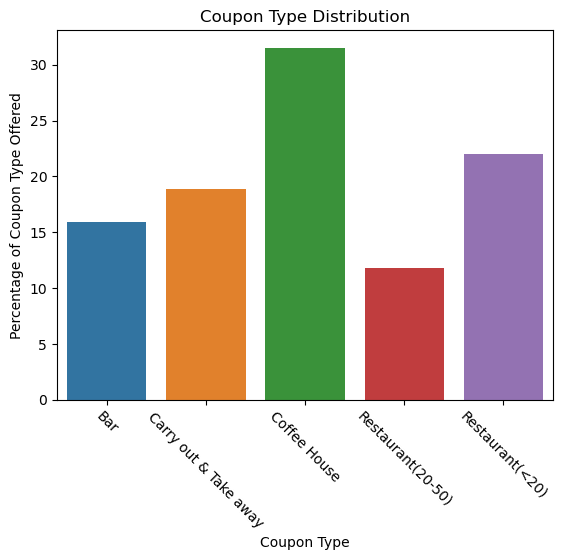

In [221]:
coupon_series = data["Coupon Type"].value_counts(normalize=True)
coupon_series.sort_index(inplace=True)
sns.barplot(x = coupon_series.index, y = coupon_series*100, hue=coupon_series.index)
plt.title("Coupon Type Distribution")
plt.ylabel("Percentage of Coupon Type Offered")
plt.xlabel("Coupon Type")
plt.xticks(rotation=-45)
plt.savefig("images/coupon_type_distribution.png")


6. Use a histogram to visualize the temperature column.

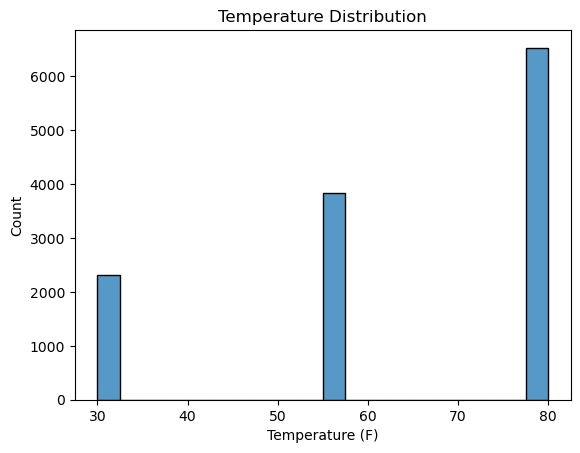

In [222]:
sns.histplot(data['Temperature (F)'], bins=20)
plt.title("Temperature Distribution")
plt.savefig('images/temperature_distribution.png')

Most of the data in the data set is pre binned making a histogram not all that useful for this data set

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [223]:
bar_df = data[data['Coupon Type'] == 'Bar']
bar_df.head()

,Destination,passanger,Weather Conditions,Temperature (F),Time,Coupon Type,Expiration,Gender,Age Group,Marital Status,...,Coffee House,Carry out & Take away,Restaurant < $20,Restaurant $20 - $50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [224]:
bar_df['Y'].sum()/len(bar_df['Y'])

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [225]:
#drop invalid visit data from the set
bar_df = bar_df.dropna(subset=['Bar'])

bar_df['Bar'].value_counts()



Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [226]:
#accptance rate of of 3 or fewer visits per month
three_or_fewer_visits = bar_df.loc[bar_df['Bar'].isin(['1~3', 'less1', 'never']) , 'Y']
less_frac = three_or_fewer_visits.sum()/len(three_or_fewer_visits)

three_or_grater_visits = bar_df.loc[bar_df['Bar'].isin(['4~8', 'gt8']) , 'Y']
greater_frac = three_or_grater_visits.sum()/len(three_or_grater_visits)
print("Three or less bar visits per month coupon accptance percentage: ", 100*less_frac, "\nFour or more visits per month coupon accptance percentage: ", 100*greater_frac)


Three or less bar visits per month coupon accptance percentage:  37.061769616026716 
Four or more visits per month coupon accptance percentage:  76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [227]:
gt_25_bar_bool_arr = bar_df['Bar'].isin(['1~3','4~8', 'gt8']) & (bar_df['Age Group'] > 25)
gt25_bar = bar_df.loc[gt_25_bar_bool_arr, 'Y'].sum()/len(bar_df.loc[gt_25_bar_bool_arr, 'Y'])
not_gt25_bar = bar_df.loc[~gt_25_bar_bool_arr, 'Y'].sum()/len(bar_df.loc[~gt_25_bar_bool_arr, 'Y'])

print("Acceptance rate of bar coupons for those over 25 who vist more than once a month: ", 100*gt25_bar, "\nAcceptance rate of bar coupons for all others: ", 100*not_gt25_bar)
print("There is is a significant difference in acceptance rate between the two groups")

Acceptance rate of bar coupons for those over 25 who vist more than once a month:  69.52380952380952 
Acceptance rate of bar coupons for all others:  33.43908629441624
There is is a significant difference in acceptance rate between the two groups


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [228]:
bool_arr = bar_df['Bar'].isin(['1~3','4~8', 'gt8']) & ~bar_df['passanger'].isin(['Kids(s)']) & ~(bar_df['occupation'].isin(['Farming Fishing & Forestry']))
no_kids_no_farm = bar_df.loc[bool_arr, 'Y'].sum()/len(bar_df.loc[bool_arr, 'Y'])
kids_and_farm = bar_df.loc[~bool_arr, 'Y'].sum()/len(bar_df.loc[~bool_arr, 'Y'])

print("Acceptance rate of bar coupons for thos who vist more than once a month and were with out kids as passangers\nand are in and are in an occupation other than farming, fishing, or forestry: ", 100*no_kids_no_farm, "\nAcceptance rate of bar coupons for all others: ", 100*kids_and_farm)
print("There is is a significant difference in acceptance rate between the two groups")

Acceptance rate of bar coupons for thos who vist more than once a month and were with out kids as passangers
and are in and are in an occupation other than farming, fishing, or forestry:  68.79194630872483 
Acceptance rate of bar coupons for all others:  29.214285714285715
There is is a significant difference in acceptance rate between the two groups


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [229]:
bool_arr_1 = bar_df['Bar'].isin(['1~3','4~8', 'gt8']) & ~bar_df['passanger'].isin(['Kids(s)']) & ~(bar_df['Marital Status'].isin(['Widowed']))
bool_arr_2 = bar_df['Bar'].isin(['1~3','4~8', 'gt8']) & (bar_df['Age Group'] < 30)
bool_arr_3 = bar_df['Restaurant < $20'].isin(['4~8', 'gt8']) & bar_df['Annual Income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

all_bool_arr = bool_arr_1 & bool_arr_2 & bool_arr_3

mention_group = bar_df.loc[all_bool_arr, 'Y'].sum()/len(bar_df.loc[all_bool_arr, 'Y'])
not_mention_group = bar_df.loc[~all_bool_arr, 'Y'].sum()/len(bar_df.loc[~all_bool_arr, 'Y'])

print("Acceptance rate for above group: ", 100*mention_group, "\nAcceptance rate for all others: ", 100*not_mention_group)
print("There is is a significant difference in acceptance rate between the two groups")


Acceptance rate for above group:  76.04166666666666 
Acceptance rate for all others:  39.26315789473684
There is is a significant difference in acceptance rate between the two groups


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [230]:
print("They drink at least once a week. They're also likely to be younger and with out children at the time or have a lower income")

They drink at least once a week. They're also likely to be younger and with out children at the time or have a lower income


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [231]:
coffee_df = data[data['Coupon Type'] == 'Coffee House']
coffee_df.head()

,Destination,passanger,Weather Conditions,Temperature (F),Time,Coupon Type,Expiration,Gender,Age Group,Marital Status,...,Coffee House,Carry out & Take away,Restaurant < $20,Restaurant $20 - $50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [232]:
accepted = coffee_df['Y'].sum()/len(coffee_df['Y'])
print("Acceptance percent of coffee house coupons: ", 100*accepted)

Acceptance percent of coffee house coupons:  49.92492492492492


In [233]:
#drop invalid visit data from the set
coffee_df = coffee_df.dropna(subset=['Coffee House'])
coffee_df['Coffee House'].value_counts()


Coffee House
less1    1075
1~3      1042
never     927
4~8       538
gt8       342
Name: count, dtype: int64

C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


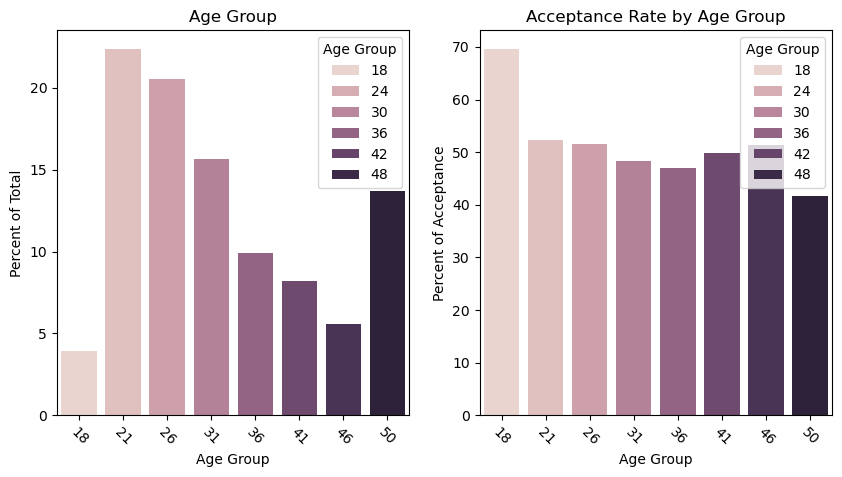

C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


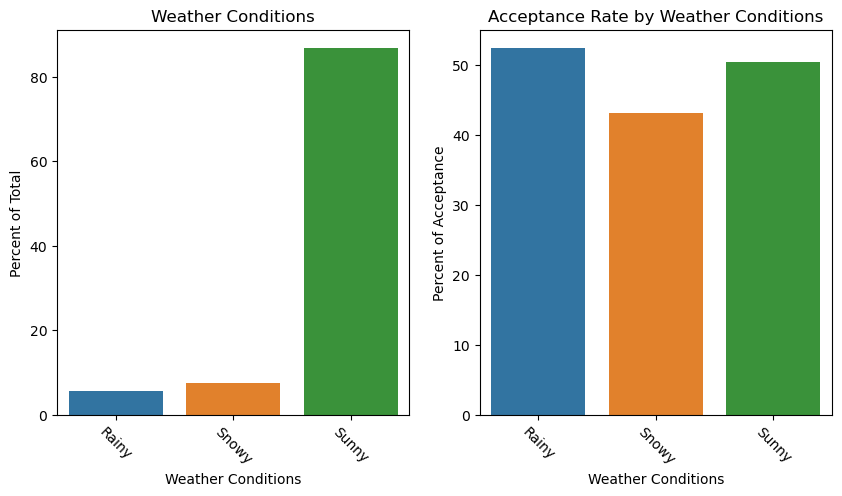

C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


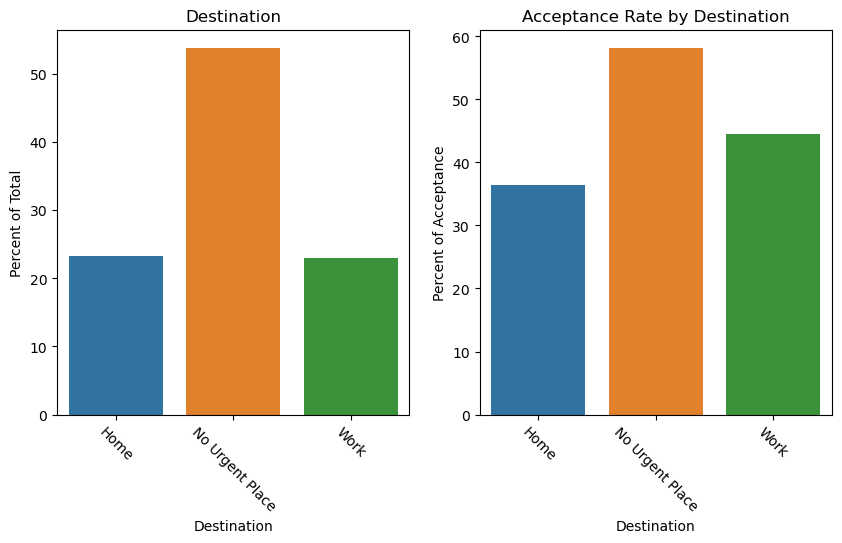

C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


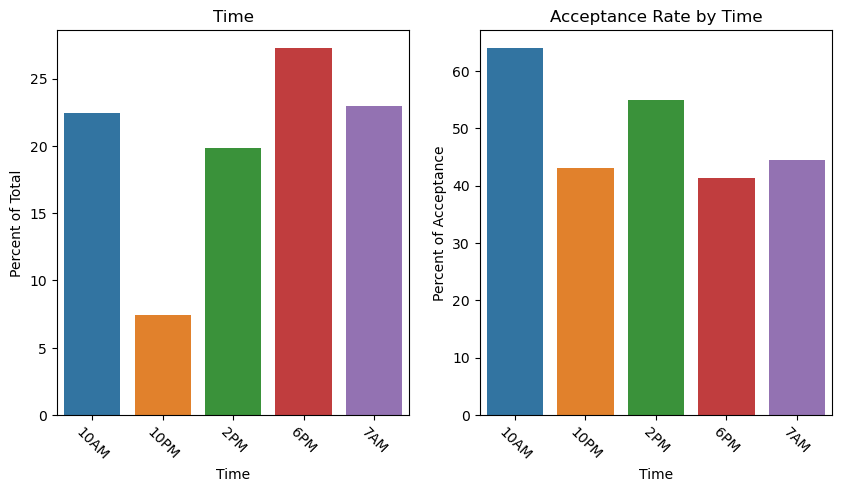

C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


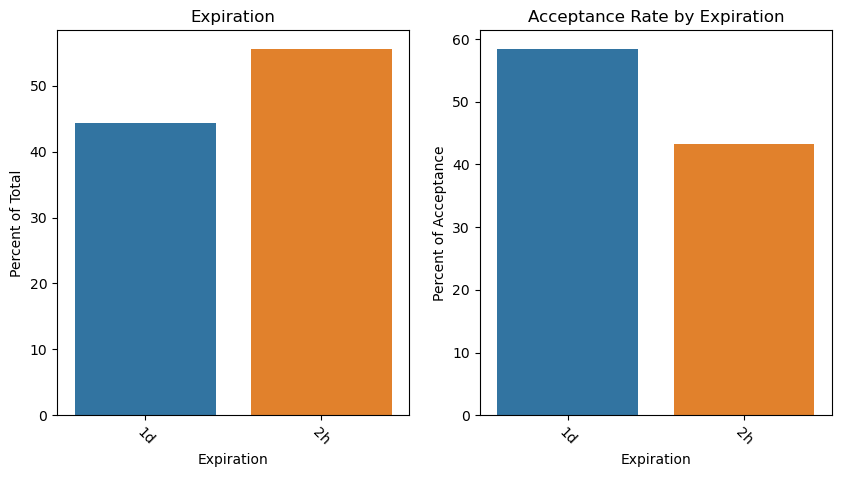

C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


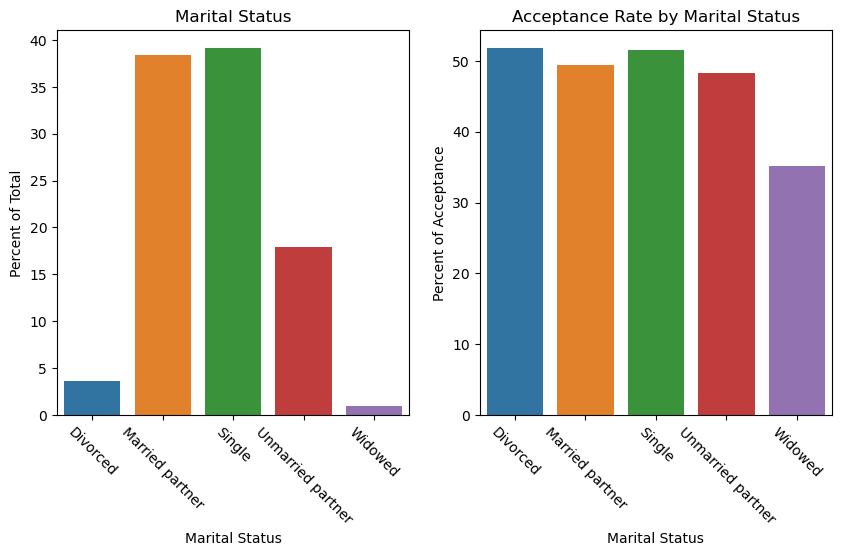

C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


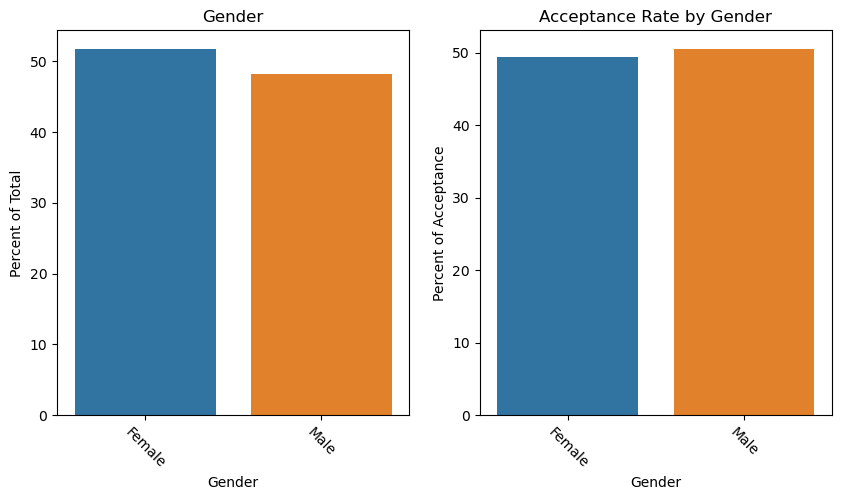

C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
C:\Users\stepa\AppData\Local\Temp\ipykernel_46476\842473874.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)


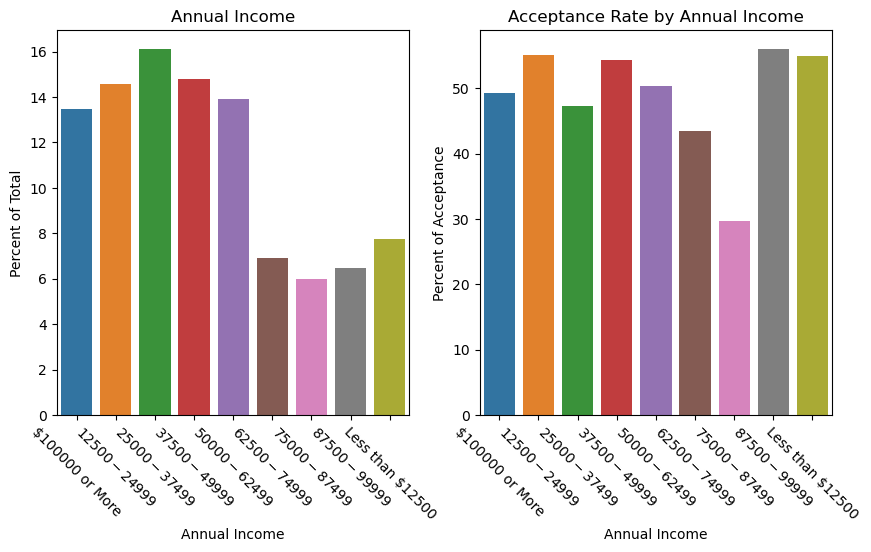

In [234]:
list_of_categories_to_examine = ['Age Group', 'Weather Conditions', 'Destination', 'Time', 'Expiration', 'Marital Status', 'Gender', 'Annual Income']

for col in list_of_categories_to_examine:
    #print(coffee_df[col].value_counts( normalize = True))
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    val_count_series = coffee_df[col].value_counts(normalize=True)
    val_count_series.sort_index(inplace=True)
    sns.barplot(ax=axes[0], x = val_count_series.index, y = val_count_series*100, hue=val_count_series.index)
    axes[0].set_title(col)
    axes[0].set_ylabel("Percent of Total")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-45)
    
    
    acceptance_percent =100* (coffee_df.groupby(col)['Y'].sum() / coffee_df.groupby(col)['Y'].count())
    acceptance_percent = acceptance_percent.sort_values(ascending=False)
    acceptance_percent.sort_index(inplace=True)

    sns.barplot(ax=axes[1], x = acceptance_percent.index, y = acceptance_percent, hue=acceptance_percent.index)
    axes[1].set_title("Acceptance Rate by " + col)
    axes[1].set_ylabel("Percent of Acceptance")
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-45)

    plt.savefig("Images/coffee_" + col + "_rates.png")
    
    plt.show()
    

## Conclusion 

Coffee coupon accepters tend to:

- Have lower income
- be younger
- accept the coupon in the late morning or early afternoon 
- not be headed anywere in particular